In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
sample = pd.read_csv('/content/sample_submission.csv')
sample.head(10)

,id,Attrition
0,1677,0.119261
1,1678,0.119261
2,1679,0.119261
3,1680,0.119261
4,1681,0.119261
5,1682,0.119261
6,1683,0.119261
7,1684,0.119261
8,1685,0.119261
9,1686,0.119261


In [ ]:
print(sample['Attrition'].max(), sample['Attrition'].min())

0.1192605843768634 0.1192605843768634


In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1119 non-null   int64  
 1   Attrition  1119 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 17.6 KB


In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')


In [ ]:
pd.set_option('display.max_columns', None)
train_data.head(2)

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0


In [ ]:
#train_data[['HourlyRate','DailyRate','MonthlyIncome', 'MonthlyRate']]

In [ ]:
test_data.head(2)

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,Male,43,3,1,Laboratory Technician,3,Single,2318,17778,1,Y,No,12,3,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,Male,67,3,2,Sales Executive,1,Divorced,5486,12421,6,Y,Yes,12,3,3,80,1,7,3,3,2,2,2,2


In [ ]:
test_data_id = test_data.id

In [ ]:
train_data.shape, test_data.shape # We have 1677 rows and 35 columns for training and 1119 rows and 34 columns for testing

((1677, 35), (1119, 34))

In [ ]:
train_data.isnull().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [ ]:
test_data.isnull().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

No missing value in both the training and testing dataset

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [ ]:
train_data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,2.791890,6196.049493,14770.048301,2.574836,14.903399,3.127609,2.751342,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,1.097396,4520.050754,7112.203888,2.480215,3.420801,0.333753,1.077905,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1010.000000,636.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,2.000000,2875.000000,8509.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,3.000000,4834.000000,15332.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,4.000000,7403.000000,20990.000000,4.000000,17.000000,3.000000,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,4.000000,19973.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [ ]:
train_data.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

## Exploratory Data Analysis

In [ ]:
train_data['Age'].min(), train_data['Age'].max() #Employees are of the age range 18 to 60

(18, 60)

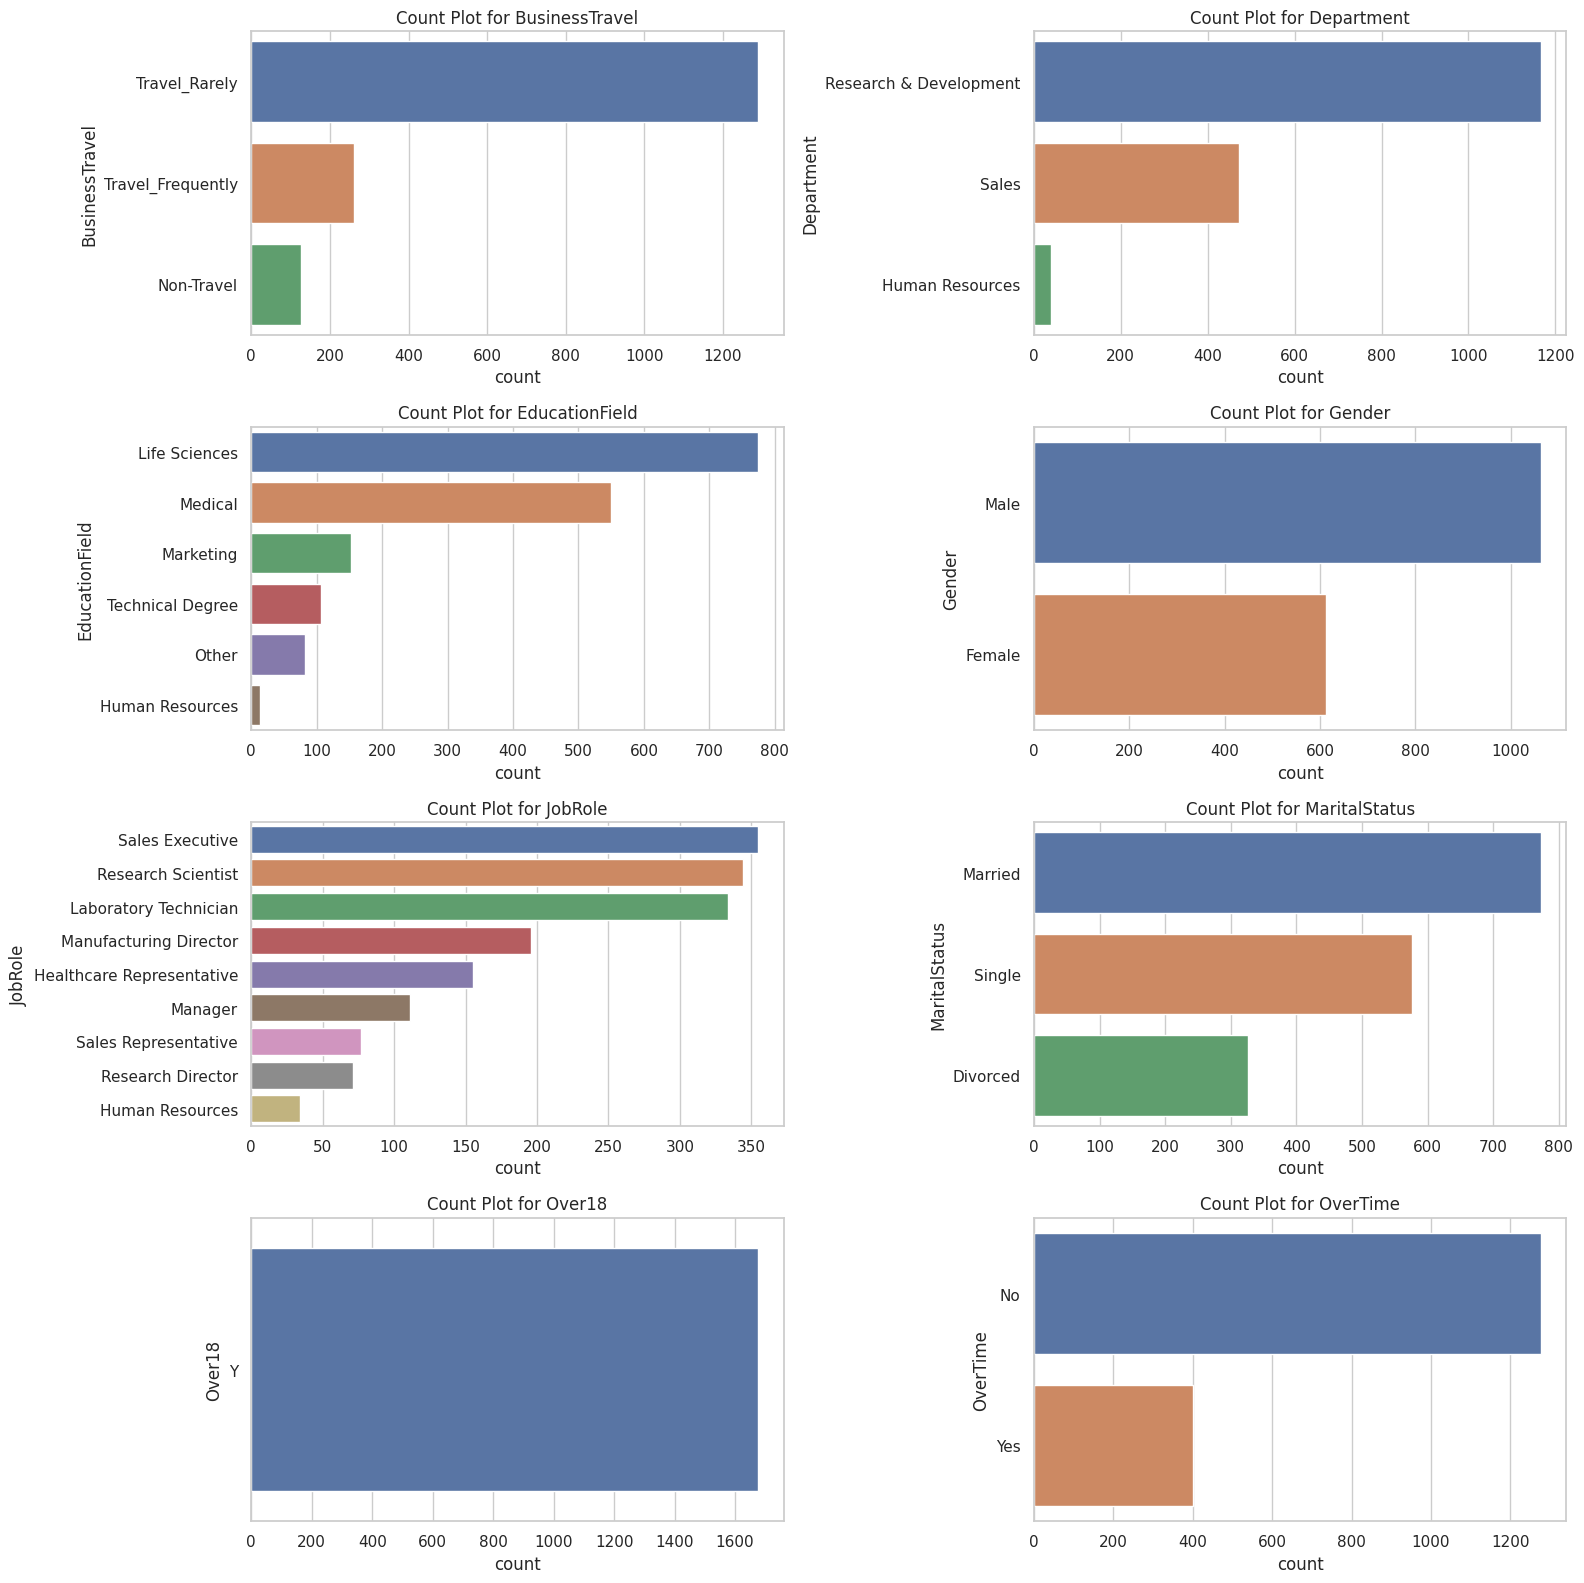

In [ ]:
# Assuming df is your DataFrame
#categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
categorical_features = train_data.select_dtypes(include=['object', 'category']).columns

sns.set(style="whitegrid")

# Determine the grid size (rows x columns)
n_cols = 2  # Number of columns
n_rows = int(len(categorical_features) / n_cols) + (len(categorical_features) % n_cols > 0)

# Create a subplot for each categorical feature
plt.figure(figsize=(16, n_rows * 4))  # Adjust the figure size here
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(y=feature, data=train_data, order=train_data[feature].value_counts().index)
    plt.title(f'Count Plot for {feature}')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()



In [ ]:
test_data['StandardHours'].value_counts()

80    1119
Name: StandardHours, dtype: int64

In [ ]:
print(test_data['Over18'].nunique())
print(test_data['StandardHours'].nunique())
print(test_data['EmployeeCount'].nunique())
# After thourough checking it is realise that the Over18, StandardHour and EmployeeCount columns consist just one unique value, They will not be contributing anything to this dataset, so we will be dropping them on both the train and test data.

1
1
1


In [ ]:
# Drop the 'Over18' and 'StandardHours' columns
train_data.drop(['id', 'Over18', 'StandardHours', 'EmployeeCount'], axis=1, inplace=True)
test_data.drop(['id', 'Over18', 'StandardHours', 'EmployeeCount'], axis=1, inplace=True)

In [ ]:
train_data.shape, test_data.shape

((1677, 31), (1119, 30))

## Visualizing if there is Outlier

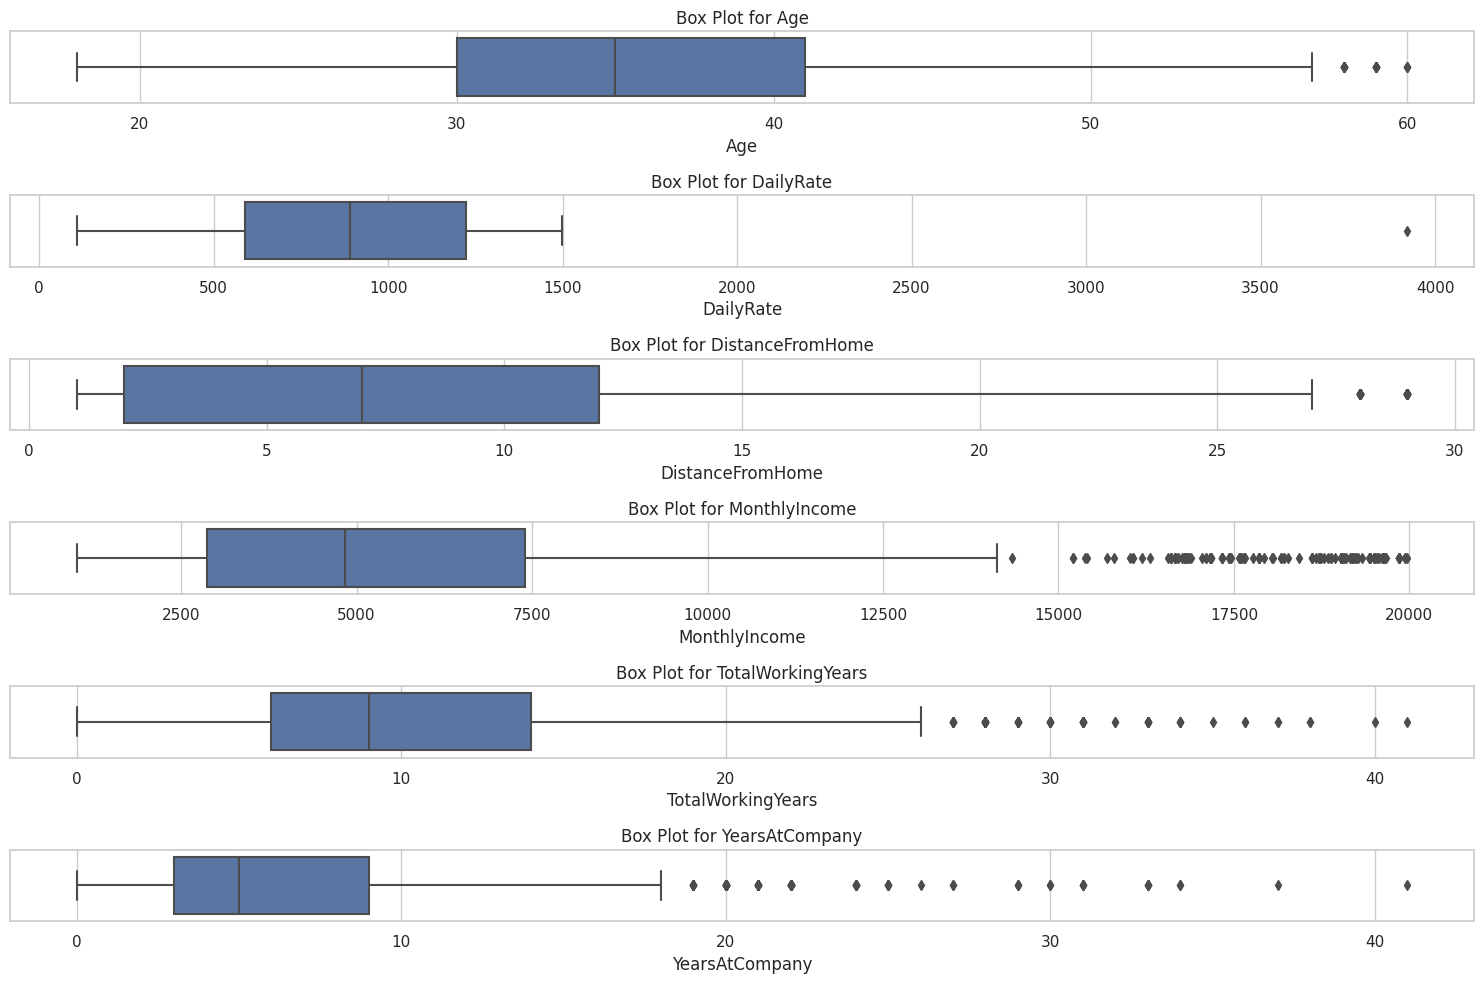

In [ ]:

# Replace this with your actual list of numerical features
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']

# Setting aesthetic parameters for seaborn
sns.set(style="whitegrid")

# Create a subplot for each numerical feature
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=train_data[feature])
    plt.title(f'Box Plot for {feature}')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
train_data['DailyRate'].min()

107

## Realtionship between Attrition and other features

In [ ]:
correlation = train_data.corr()['Attrition'].sort_values()
print(correlation)


StockOptionLevel           -0.194018
Age                        -0.161044
JobInvolvement             -0.139929
TotalWorkingYears          -0.138740
JobLevel                   -0.137238
YearsInCurrentRole         -0.133466
YearsAtCompany             -0.127120
MonthlyIncome              -0.126896
YearsWithCurrManager       -0.124712
EnvironmentSatisfaction    -0.092426
RelationshipSatisfaction   -0.087537
Education                  -0.084305
JobSatisfaction            -0.061010
WorkLifeBalance            -0.045365
YearsSinceLastPromotion    -0.038496
HourlyRate                 -0.037280
PercentSalaryHike          -0.031571
DailyRate                  -0.022380
TrainingTimesLastYear      -0.018595
MonthlyRate                -0.005484
PerformanceRating           0.013666
DistanceFromHome            0.024741
NumCompaniesWorked          0.037127
Attrition                   1.000000
Name: Attrition, dtype: float64


<ipython-input-24-3d6513a05f28>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_data.corr()['Attrition'].sort_values()


<ipython-input-25-b9bb38df575c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


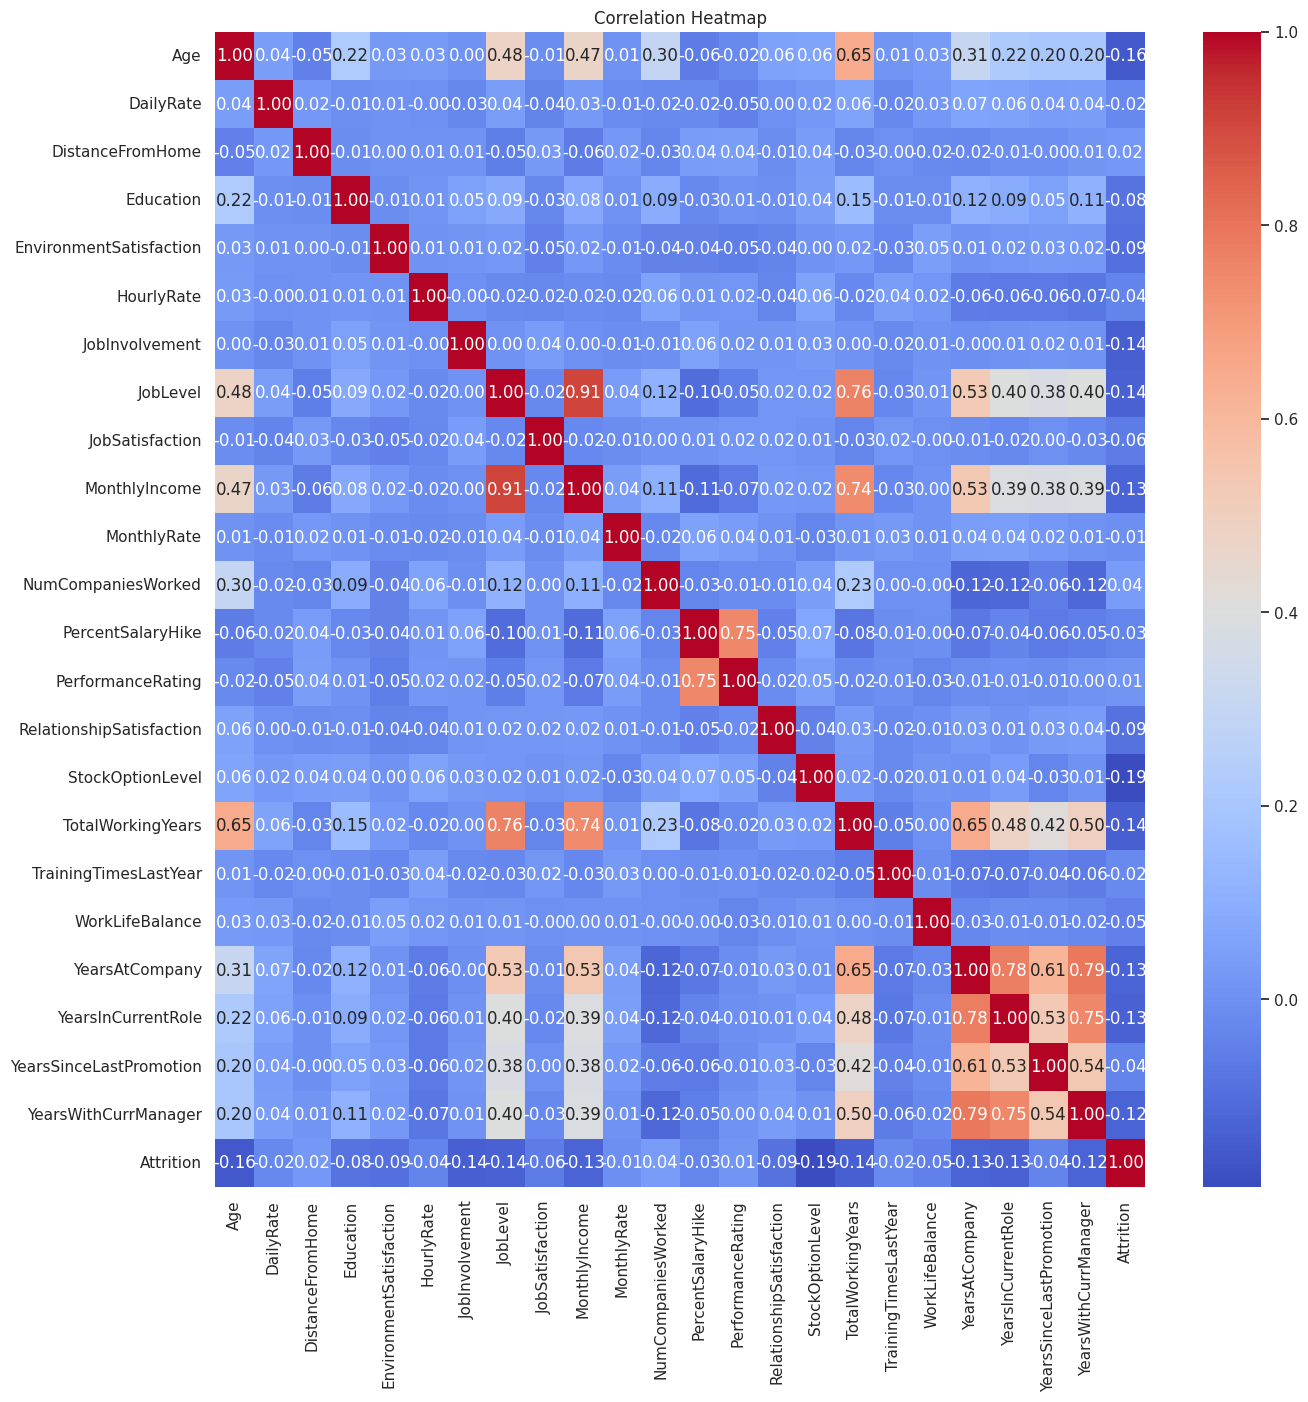

In [ ]:
correlation_matrix = train_data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")

plt.show()


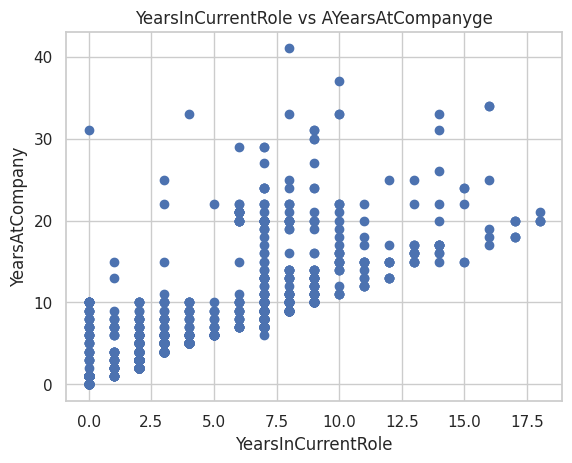

In [ ]:

plt.scatter(train_data['YearsInCurrentRole'], train_data['YearsAtCompany'])
plt.xlabel('YearsInCurrentRole')
plt.ylabel('YearsAtCompany')
plt.title('YearsInCurrentRole vs AYearsAtCompanyge')
plt.show()


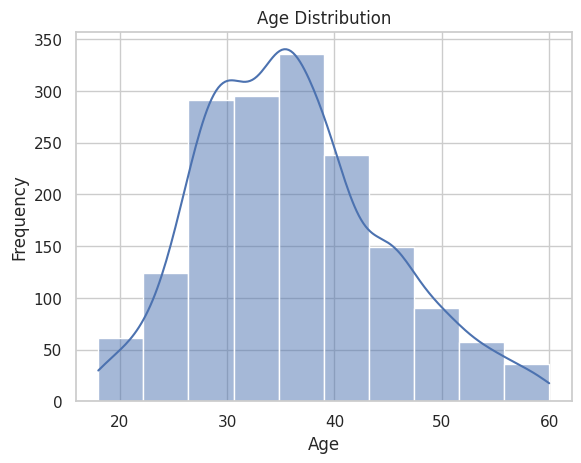

In [ ]:

sns.histplot(train_data['Age'], bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


In [ ]:
train_data.Attrition.value_counts() # We can see we have imbalanced dataset for the target value

0    1477
1     200
Name: Attrition, dtype: int64

## Feature Engineering

In [ ]:
train_data.shape, test_data.shape

((1677, 31), (1119, 30))

In [ ]:
categorical_features = train_data.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features, drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features, drop_first=True)

# df_encoded now contains the original data with one-hot encoded columns


In [ ]:
train_data_encoded.shape, test_data_encoded.shape

((1677, 45), (1119, 44))

In [ ]:
train_data_encoded.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Res

## Scaling the Data

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Assuming you have training data (train_df) and test data (test_df)
# Apply the scaler to the features only, excluding the target variable 'Attrition'
train_features_scaled = scaler.fit_transform(train_data_encoded.drop('Attrition', axis=1))

# Transform the training features
train_data_scaled = scaler.transform(train_data_encoded.drop('Attrition', axis=1))

# Transform the test features (note: the test data doesn't have the 'Attrition' column)
test_data_scaled = scaler.transform(test_data_encoded)

train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_data_encoded.drop('Attrition', axis=1).columns)
test_data_scaled = pd.DataFrame(test_data_scaled, columns=test_data_encoded.columns)

# Add the 'Attrition' column back to the training data
train_data_scaled['Attrition'] = train_data_encoded['Attrition']


In [ ]:
train_data_scaled.shape, test_data_scaled.shape  #To be sure I have not tampered with the data

((1677, 45), (1119, 44))

In [ ]:
train_data_scaled.Attrition.value_counts()

0    1477
1     200
Name: Attrition, dtype: int64

## Building Our Model

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# Spliting my dataset into train and val
X = train_data_scaled.drop('Attrition', axis=1)  # Features
y = train_data_scaled['Attrition']               # Target

# Splitting the training data into a smaller training subset and a validation subset
X_train_subset, X_val, y_train_subset, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE

In [ ]:
#SMOTE to balance the dataset

oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(X_train_subset,y_train_subset)

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "SVM": SVC(probability=True),
    "Neural Network": MLPClassifier()
}

# Dictionary to hold your cross-validation results
cv_results = {}
cv = KFold(n_splits = 5, random_state=None, shuffle = False)

# Perform cross-validation and store results
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    cv_results[name] = scores
    print(f"{name}: AUC-ROC = {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(cv_results).T
results_df.columns = ['CV1', 'CV2', 'CV3', 'CV4', 'CV5']
results_df['Mean AUC-ROC'] = results_df.mean(axis=1)
results_df['Std AUC-ROC'] = results_df.std(axis=1)

# Display the results
print(results_df)


Logistic Regression: AUC-ROC = 0.8138 (+/- 0.0578)
Random Forest: AUC-ROC = 0.8170 (+/- 0.0266)
XGBoost: AUC-ROC = 0.7991 (+/- 0.0286)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 161, number of negative: 1180
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1131
[LightGBM] [Info] Number of data points in the train set: 1341, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120060 -> initscore=-1.991865
[LightGBM] [Info] Start training from score -1.991865
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 153, number of negative: 1188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network: AUC-ROC = 0.7693 (+/- 0.0267)
                          CV1       CV2       CV3       CV4       CV5  \
Logistic Regression  0.792368  0.841935  0.723185  0.812352  0.899048   
Random Forest        0.835837  0.812413  0.770266  0.848404  0.817905   
XGBoost              0.807994  0.805271  0.744328  0.828901  0.808762   
LightGBM             0.799275  0.812118  0.770215  0.802379  0.844000   
CatBoost             0.824052  0.850475  0.759076  0.836584  0.878381   
SVM                  0.785202  0.766178  0.752991  0.824542  0.833524   
Neural Network       0.767849  0.737245  0.747215  0.781176  0.813048   

                     Mean AUC-ROC  Std AUC-ROC  
Logistic Regression      0.813778     0.057847  
Random Forest            0.816965     0.026634  
XGBoost                  0.799051     0.028631  
LightGBM                 0.805597     0.023747  
CatBoost                 0.829714     0.039670  
SVM                      0.792487     0.031676  
Neural Network           0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:

# Display the results
print(results_df)

# Identify the model with the highest mean AUC-ROC score
best_model = results_df['Mean AUC-ROC'].idxmax()
best_score = results_df.loc[best_model, 'Mean AUC-ROC']
best_std = results_df.loc[best_model, 'Std AUC-ROC']

print(f"\nBest Model: {best_model}")
print(f"Mean AUC-ROC: {best_score:.4f}")
print(f"Standard Deviation: {best_std:.4f}")


                          CV1       CV2       CV3       CV4       CV5  \
Logistic Regression  0.792368  0.841935  0.723185  0.812352  0.899048   
Random Forest        0.835837  0.812413  0.770266  0.848404  0.817905   
XGBoost              0.807994  0.805271  0.744328  0.828901  0.808762   
LightGBM             0.799275  0.812118  0.770215  0.802379  0.844000   
CatBoost             0.824052  0.850475  0.759076  0.836584  0.878381   
SVM                  0.785202  0.766178  0.752991  0.824542  0.833524   
Neural Network       0.767849  0.737245  0.747215  0.781176  0.813048   

                     Mean AUC-ROC  Std AUC-ROC  
Logistic Regression      0.813778     0.057847  
Random Forest            0.816965     0.026634  
XGBoost                  0.799051     0.028631  
LightGBM                 0.805597     0.023747  
CatBoost                 0.829714     0.039670  
SVM                      0.792487     0.031676  
Neural Network           0.769307     0.026729  

Best Model: CatBoost
M

In [ ]:
# Train the best model (identified from the earlier steps) on the full training data
best_model_name = results_df['Mean AUC-ROC'].idxmax()
best_model = models[best_model_name]

# Fit the best model
best_model.fit(smote_train, smote_target)


In [ ]:
# Predict probabilities using the best model
val_probabilities = best_model.predict_proba(X_val)

# Extract the probabilities of the positive class (assuming it's the second column)
val_attrition_probs = val_probabilities[:, 1]

# Evaluate the model
val_auc_roc = roc_auc_score(y_val, val_attrition_probs)
print(f"Validation AUC-ROC: {val_auc_roc}")

Validation AUC-ROC: 0.8374066002490661


In [ ]:
test_probabilities = best_model.predict_proba(test_data_scaled)
test_attrition_probs = test_probabilities[:, 1]

# Prepare the submission file (if satisfied with validation performance)
submission = pd.DataFrame({
    'ID': test_data_id,  # Replace with your actual test IDs
    'Attrition': test_attrition_probs
})


submission.to_csv('submissioCat19_1.csv', index=False)

In [ ]:
Cat19_1 = pd.read_csv('/content/submissioCat19_1.csv')
Cat19_1.head()

,ID,Attrition
0,1677,0.099254
1,1678,0.091532
2,1679,0.011940
3,1680,0.040238
4,1681,0.436478


In [ ]:
Cat19_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1119 non-null   int64  
 1   Attrition  1119 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 17.6 KB


## HyperParameter Tuning


In [ ]:
! pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.3 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
def objective(trial):
    # Define hyperparameter space
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    # Create and fit the CatBoost model
    model = CatBoostClassifier(**params, verbose=0)
    model.fit(smote_train, smote_target, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=0)

    # Predict on validation set
    preds = model.predict_proba(X_val)[:, 1]

    # Return the AUC score
    auc_score = roc_auc_score(y_val, preds)
    return auc_score


In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best parameters
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))


[I 2023-12-17 05:00:14,018] A new study created in memory with name: no-name-c2d01340-eb5c-4a26-9233-9419172c924b
[I 2023-12-17 05:02:18,833] Trial 0 finished with value: 0.8184931506849316 and parameters: {'learning_rate': 0.002494540196981932, 'depth': 10, 'subsample': 0.9316644204580371, 'colsample_bylevel': 0.8331703268143296, 'min_data_in_leaf': 87}. Best is trial 0 with value: 0.8184931506849316.
[I 2023-12-17 05:02:59,426] Trial 1 finished with value: 0.8200498132004982 and parameters: {'learning_rate': 0.0036938452394534734, 'depth': 10, 'subsample': 0.7965078997233901, 'colsample_bylevel': 0.2751564408757777, 'min_data_in_leaf': 29}. Best is trial 1 with value: 0.8200498132004982.
[I 2023-12-17 05:03:06,411] Trial 2 finished with value: 0.824719800747198 and parameters: {'learning_rate': 0.0030397002157335133, 'depth': 5, 'subsample': 0.8848861842427088, 'colsample_bylevel': 0.9447537170620881, 'min_data_in_leaf': 35}. Best is trial 2 with value: 0.824719800747198.
[I 2023-12-

Best trial: score 0.8545298879202989, params {'learning_rate': 0.06567830295541172, 'depth': 2, 'subsample': 0.40007181474903086, 'colsample_bylevel': 0.35773249290633446, 'min_data_in_leaf': 66}


In [ ]:
# Best parameters from Optuna (replace this with your actual best parameters)
best_params = study.best_trial.params

# Initialize the CatBoost model with the best parameters
best_model = CatBoostClassifier(**best_params, verbose=0)

# Fit the model on the entire training dataset (replace X_train and y_train with your data)
best_model.fit(smote_train, smote_target)

# Predict probabilities on the validation set
val_probabilities = best_model.predict_proba(X_val)

# Extract the probabilities of the positive class
val_attrition_probs = val_probabilities[:, 1]

# Calculate and print the AUC-ROC score
val_auc_roc = roc_auc_score(y_val, val_attrition_probs)
print(f"Validation AUC-ROC: {val_auc_roc}")


Validation AUC-ROC: 0.8430105853051059


In [ ]:
test_probabilities = best_model.predict_proba(test_data_scaled)
test_attrition_probs = test_probabilities[:, 1]

# Prepare the submission file (if satisfied with validation performance)
submission = pd.DataFrame({
    'ID': test_data_id,  # Replace with your actual test IDs
    'Attrition': test_attrition_probs
})


submission.to_csv('submissionCat19.csv', index=False)

In [ ]:
Cat19 = pd.read_csv('/content/submissionCat19.csv')
Cat19.head()

,ID,Attrition
0,1677,0.123465
1,1678,0.166230
2,1679,0.013850
3,1680,0.051145
4,1681,0.601063


In [ ]:
Cat19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1119 non-null   int64  
 1   Attrition  1119 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 17.6 KB


## Save train model

In [ ]:
import pickle

In [ ]:
pickle_out = open("classifier.pkl", mode = "wb")
pickle.dump(best_model, pickle_out)
pickle_out.close()

In [ ]:
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scienti

In [ ]:
train_data.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [ ]:
'id', 'Over18', 'StandardHours', 'EmployeeCount'

In [ ]:
train_data['BusinessTravel'].unique()

array(['Travel_Frequently', 'Travel_Rarely', 'Non-Travel'], dtype=object)